In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV

In [2]:
df_tr_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph1_bytime.csv", encoding='cp949')
df_ts_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_in.csv", encoding='cp949')
df_ts_2 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_out.csv", encoding='cp949')

In [3]:
df_tr = df_tr_1.replace('Normal', 0)
df_ts_1 = df_ts_1.replace('정상', 0)
df_ts_1 = df_ts_1.replace('이상', 1)
df_ts_2 = df_ts_2.replace('정상', 0)
df_ts_2 = df_ts_2.replace('이상', 1)

In [4]:
df_tr_1 = df_tr_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_1 = df_ts_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_2 = df_ts_2.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})

In [5]:
df_tr = df_tr_1.iloc[:, 7:49] # train
df_ts = pd.concat([df_ts_1.iloc[:,7:49], df_ts_2.iloc[:,7:49]])
df_tr_x = df_tr.iloc[:,:-1]
df_ts_x = df_ts.iloc[:,:-1]

In [6]:
df_tr_x = df_tr_x.reset_index(drop = True)
df_tr_x = np.array(df_tr_x)
df_ts_x = df_ts_x.reset_index(drop = True)
df_ts_x = np.array(df_ts_x)

In [7]:
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.5)

In [28]:
param_grid = {'n_neighbors' : [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], 'contamination' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],}

In [29]:
clf = LocalOutlierFactor()

In [30]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid,
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2
                          )

In [31]:
grid_search.fit(df_tr_x)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=LocalOutlierFactor(), n_jobs=-1,
             param_grid={'contamination': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28]},
             scoring='accuracy', verbose=2)

In [32]:
grid_search.best_params_

{'contamination': 0.1, 'n_neighbors': 5}

In [56]:
clf2 = LocalOutlierFactor(n_neighbors=200, contamination=0.1)

In [57]:
clf2.fit(df_tr_x)

LocalOutlierFactor(contamination=0.1, n_neighbors=200)

In [58]:
clf2.fit_predict(df_ts_x)

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
x_score = clf2.negative_outlier_factor_

(-6.0, 0.5)

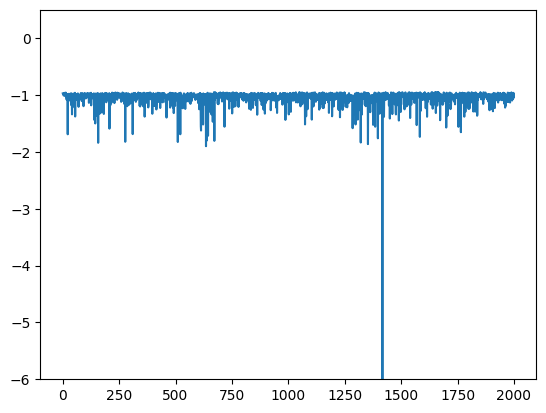

In [60]:
plt.plot(x_score)
plt.ylim(-6,0.5)

In [61]:
x_score_1 = abs(x_score)

(0.0, 6.0)

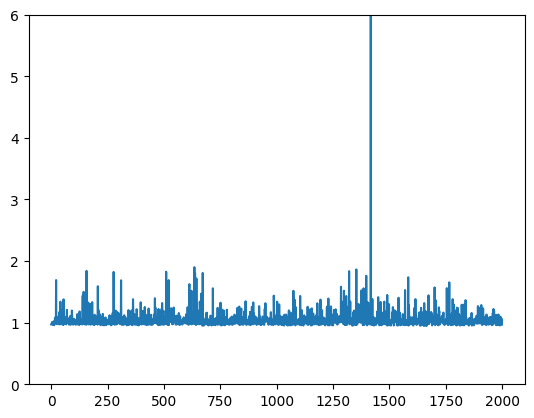

In [62]:
plt.plot(x_score_1)
plt.ylim(0,6)

In [63]:
from collections import Counter

In [64]:
alpha = []
beta = []
for i in range(0,5000,1):
    i = i/1000
    q = np.where(x_score_1[0:1000] > i)
    q = np.array(q).size
    w = np.where(x_score_1[1000:2000] < i)
    w = np.array(w).size
    alpha.append(q)
    beta.append(w)


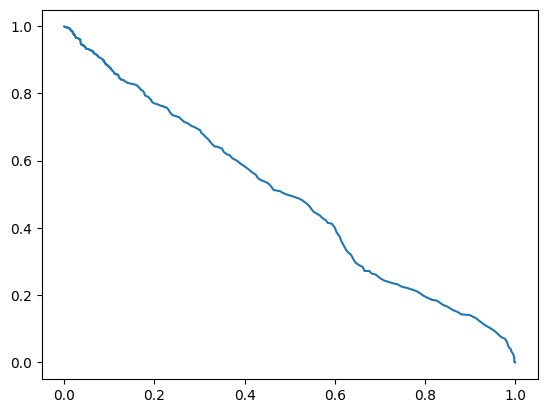

In [65]:
plt.plot(np.array(alpha)/1000,np.array(beta)/1000)
plt.show()

In [43]:
np.array(q).size

1

In [44]:
np.where(x_score_1[1:1001] > 1.5) # 정상분류

(array([ 21, 143, 156, 206, 276, 309, 509, 520, 611, 612, 621, 634, 637,
        643, 671, 716], dtype=int64),)

In [45]:
np.where(x_score_1[1000:2001] < 1.5)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [142]:
t = np.vstack((df_ts_x[:1000],df_tr_x[:100]))

(0.0, 6.0)

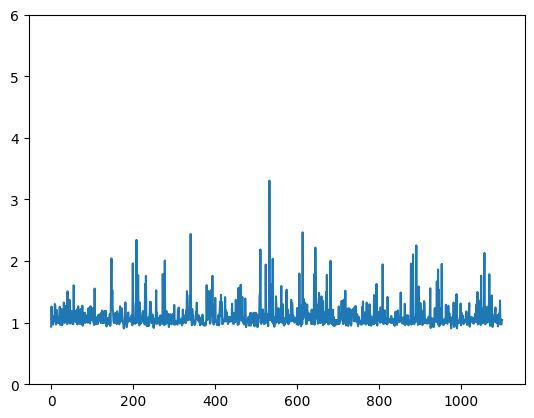

In [143]:
clf3 = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
clf3.fit(df_tr_x)
clf3.fit_predict(t)
x_score_2 = abs(clf3.negative_outlier_factor_)

plt.plot(x_score_2)
plt.ylim(0,6)

In [151]:
alpha_2 = []
beta_2 = []
for i in range(0,5000,1):
    i = i/1000
    q_2 = np.where(x_score_2[:1000] > i)
    q_2 = np.array(q_2).size
    w_2 = np.where(x_score_2[1000:] < i)
    w_2 = np.array(w_2).size
    alpha_2.append(q_2)
    beta_2.append(w_2)


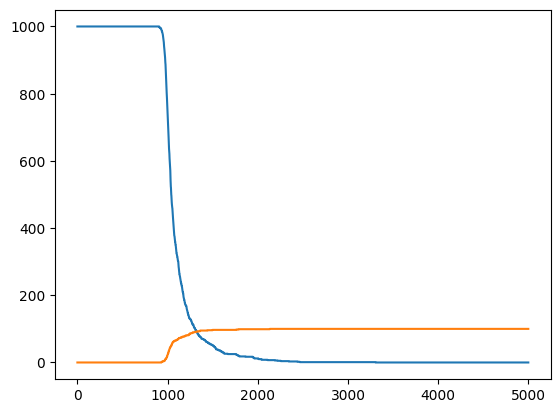

In [152]:
plt.plot(alpha_2)
plt.plot(beta_2)

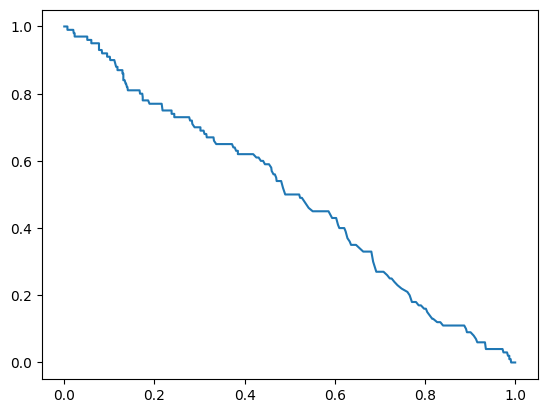

In [153]:
plt.plot(np.array(alpha_2)/1000,np.array(beta_2)/100)
plt.show()